# Fitting and Testing a Neural Network

**Note:** The first three sections of this notebook are the same steps followed on the previous demos.

In [1]:
# Initial imports
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Data Generation and Preprocessing

In [2]:
# Generate 1000 demo data samples with 2 features and two centers
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1)

In [3]:
# Transforming y to a vertical vector
y = y.reshape(-1, 1)
y.shape

(1000, 1)

In [4]:
# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y
df.head()

,Feature 1,Feature 2,Target
0,-3.058373,4.488258,0
1,-8.609739,-3.727149,1
2,1.371297,5.231074,0
3,-9.339176,-2.954447,1
4,-11.571786,-3.852755,1


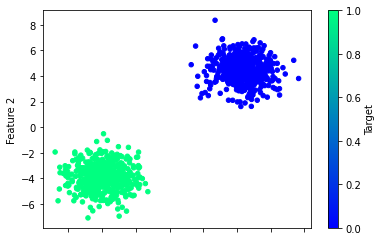

In [5]:
# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [6]:
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [7]:
# Create scaler instance
X_scaler = StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Creating a Neural Network Model

In [8]:
# Create a sequential neural network model
neuron = Sequential()

In [9]:
# Add the input and the hidden layer to the model
number_inputs = 2
number_hidden_nodes = 3

neuron.add(Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

In [10]:
# Add the output layer
number_classes = 1

neuron.add(Dense(units=number_classes, activation="sigmoid"))

In [11]:
# Display model summary
neuron.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


## Compiling a Neural Network Model

In [12]:
neuron.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

## Fitting and Testing a Neural Network

In [13]:
model = neuron.fit(X_train, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 3ms/step - loss: 0.9111 - accuracy: 0.1000
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7017 - accuracy: 0.3120
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5643 - accuracy: 0.6280
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4739 - accuracy: 0.7453
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4064 - accuracy: 0.9880
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3466 - accuracy: 0.9893
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2889 - accuracy: 0.9893
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2349 - accuracy: 0.9907
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1895 - accuracy: 0.9907
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1548 - accuracy: 0.9920
Epoch 11/

## Plotting Loss and Accuracy

In [14]:
# Create a DataFrame with the history dictionary
df = pd.DataFrame(model.history, index=range(1, len(model.history['loss'])+1))

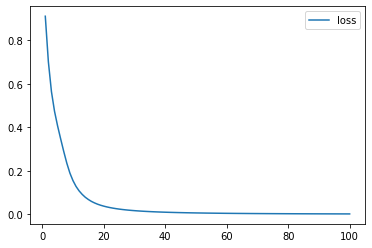

In [15]:
# Plot the loss
df.plot(y='loss')

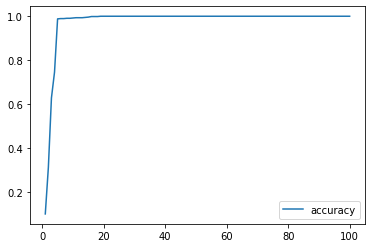

In [16]:
# Plot the accuracy
df.plot(y='accuracy')

### Evaluating the Model Performance

In [17]:
# Evaluate the model using testing data
model_loss, model_accuracy = neuron.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, and accuracy is:{model_accuracy}")
# Display evaluation results


8/8 - 0s - loss: 0.0012 - accuracy: 1.0000 - 310ms/epoch - 39ms/step
Loss: 0.0012425209861248732, and accuracy is:1.0
